Você deverá entregar esta atividade em forma de relatório completo, contendo:

Código-fonte utilizado;

Gráficos gerados com legenda e análise;

Tabelas comparativas de erros e métodos;

Discussão crítica dos resultados e da metodologia;

Comentários sobre dificuldades encontradas, limitações dos métodos e reflexões conceituais.

 

 

O objetivo desta atividade é aplicar métodos numéricos de integração a uma função com comportamento singular, analisando seus desafios e interpretações físicas.
 
Considere a função:

f(x)=1x 


Essa função aparece na física em diversos contextos, como o campo elétrico gerado por uma carga pontual (E∝1r2 
, cuja integral envolve 1r 
) e o potencial gravitacional de uma massa pontual (V∝1r 
).

 

Considere o intervalo x∈[1,2] 
, no qual a função é bem comportada e não diverge.

 

 

 

a) Visualização e interpretação analítica
 

 

Plote o gráfico da função f(x)=1x 
 no intervalo de 1 a 2.

Calcule a função primitiva de f(x) 
, ou seja, sua integral indefinida.

Plote também a função primitiva.

Calcule o valor da integral definida de x=1 
 a x=2 
.

Comente:

 

O resultado da integral possui interpretação física?

O gráfico da função ajuda a prever o valor da área?

 

 

 

 

 

b) Regra do trapézio
 

 

Calcule a integral definida de f(x) 
 entre 1 e 2 utilizando a regra do trapézio com n=10 
 subintervalos.

Calcule o erro absoluto em relação ao valor exato.

Comente sobre a precisão e o comportamento do método com essa função.

 

 

 

 

c) Regra de Simpson
 

 

Calcule a mesma integral usando a regra de Simpson com n=10 
 subintervalos (n 
 deve ser par).

Calcule o erro em relação ao valor exato.

Compare com a regra do trapézio.

 

 

 

 

d) Aumento de resolução
 

 

Repita os cálculos com n=100 
 e n=1000 
 para ambos os métodos.

Apresente um gráfico comparando os valores da integral obtidos em função de n 
.

Se desejar, apresente também o erro em escala logarítmica.

Comente:

 

Ambos os métodos convergem? Há ganho significativo ao aumentar n 
?

A função apresenta alguma dificuldade numérica particular?

 

 

 

 

 

e) Método adaptativo de Simpson
 

 

Implemente o método adaptativo de Simpson com precisão alvo ϵ=10−6 
, conforme as equações da Seção 5.3 (equações 5.35 a 5.39).

Comece com n=2 
 subintervalos e dobre até atingir a precisão desejada.

Em cada passo, registre o número de subintervalos e o valor estimado da integral.

Comente:

 

O método foi mais eficiente neste caso?

Houve vantagem em termos de custo computacional?

 

 

 

 

 

Parte reflexiva (obrigatória)
 

 

A função 1x 
 é singular em x=0 
. O que mudaria nos cálculos se o intervalo incluísse esse ponto?

Em contextos físicos, por que é importante lidar com funções que divergem em certos limites?

Quais aspectos desta atividade seriam difíceis de automatizar por completo com uma IA como o ChatGPT? Onde a análise humana é essencial?

 

 

 

 

Instruções finais
 

 

Organize o relatório com seções numeradas conforme os itens acima.

Utilize gráficos com eixos e legendas apropriadas.

Relatórios que contenham apenas código e valores numéricos, sem análise e interpretação crítica, serão considerados incompletos.

 

a- Visualização e interpretação analítica

Plote o gráfico da função f(x)=1x 
 no intervalo de 1 a 2.

Calcule a função primitiva de f(x) 
, ou seja, sua integral indefinida.

Plote também a função primitiva.

Calcule o valor da integral definida de x=1 
 a x=2 



Comente:

O resultado da integral possui interpretação física?

O gráfico da função ajuda a prever o valor da área?

 

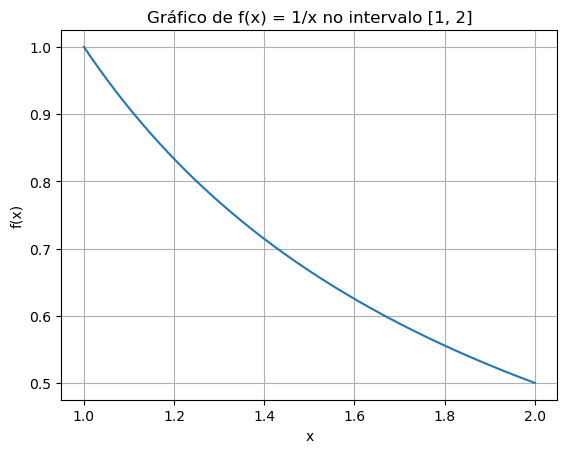

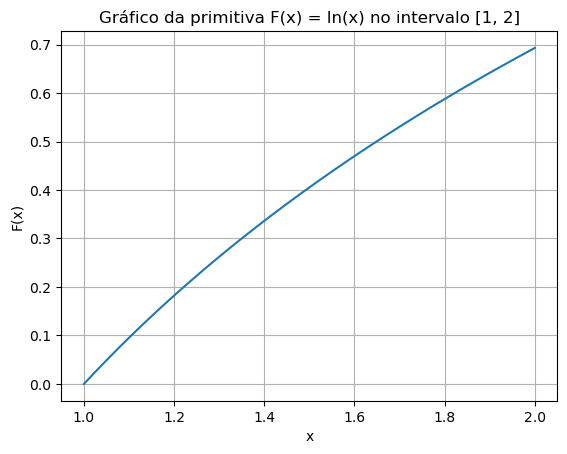

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo o intervalo de x
x = np.linspace(1, 2, 400)
y = 1 / x

# Plot de f(x) = 1/x
plt.figure()
plt.plot(x, y)
plt.title('Gráfico de f(x) = 1/x no intervalo [1, 2]')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()

# Cálculo e plot da primitiva F(x) = ln(x) + C (C = 0)
F = np.log(x)
plt.figure()
plt.plot(x, F)
plt.title('Gráfico da primitiva F(x) = ln(x) no intervalo [1, 2]')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.grid(True)
plt.show()


b- Regra do trapézio

Calcule a integral definida de f(x) 
 entre 1 e 2 utilizando a regra do trapézio com n=10 
 subintervalos.

Calcule o erro absoluto em relação ao valor exato.

Comente sobre a precisão e o comportamento do método com essa função.

In [2]:
n = 10
x_trap = np.linspace(1, 2, n+1)
y_trap = 1 / x_trap
h = (2 - 1) / n
trapz = (h / 2) * (y_trap[0] + 2 * np.sum(y_trap[1:-1]) + y_trap[-1])
exact = np.log(2)
error = abs(trapz - exact)

print(f"Valor exato da integral: {exact:.6f}")
print(f"Aproximação pela regra do trapézio (n=10): {trapz:.6f}")
print(f"Erro absoluto: {error:.6f}")

Valor exato da integral: 0.693147
Aproximação pela regra do trapézio (n=10): 0.693771
Erro absoluto: 0.000624


c- Regra de Simpson
 

 

Calcule a mesma integral usando a regra de Simpson com n=10 
 subintervalos (n 
 deve ser par).

Calcule o erro em relação ao valor exato.

Compare com a regra do trapézio.

 

In [1]:
import numpy as np

# Definição da função
f = lambda x: 1/x

# Intervalo e subintervalos
a, b = 1.0, 2.0
n = 10
h = (b - a) / n

# Ponto final exato
I_exact = np.log(2)

# Regra de Simpson
x = np.linspace(a, b, n+1)
S = h/3 * (f(a) + f(b) + 4*sum(f(x[i]) for i in range(1, n, 2)) + 2*sum(f(x[i]) for i in range(2, n, 2)))

# Regra do trapézio
T = h * (0.5*f(a) + sum(f(x[i]) for i in range(1, n)) + 0.5*f(b))

# Erros
err_S = S - I_exact
err_T = T - I_exact

# Resultados
print(f"Integral exata     = {I_exact:.8f}")
print(f"Simpson (n=10)     = {S:.8f}, erro = {err_S:.8e}")
print(f"Trapézio (n=10)    = {T:.8f}, erro = {err_T:.8e}")


Integral exata     = 0.69314718
Simpson (n=10)     = 0.69315023, erro = 3.05012899e-06
Trapézio (n=10)    = 0.69377140, erro = 6.24222615e-04


d- Aumento de resolução
 

Repita os cálculos com n=100 
 e n=1000 
 para ambos os métodos.

Apresente um gráfico comparando os valores da integral obtidos em função de n 
.

Se desejar, apresente também o erro em escala logarítmica.

Comente:

 

Ambos os métodos convergem? Há ganho significativo ao aumentar n 
?

A função apresenta alguma dificuldade numérica particular?

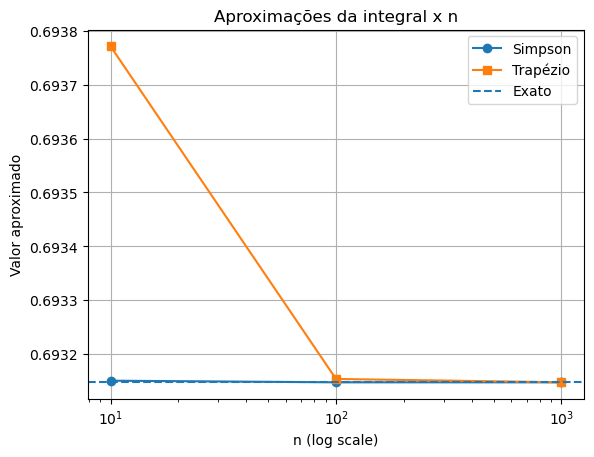

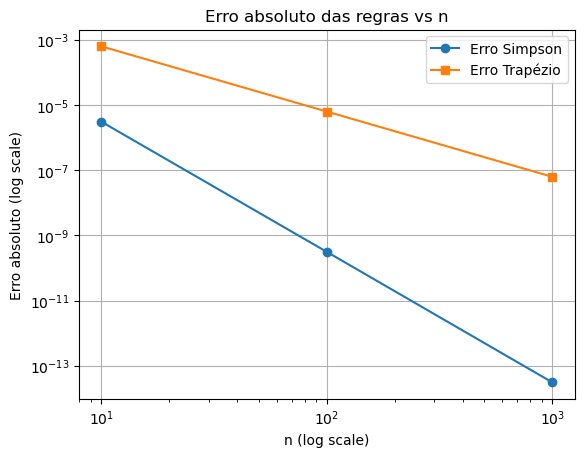

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Configurações
a, b = 1.0, 2.0
I_exact = np.log(2)
ns = [10, 100, 1000]

simpson_vals = []
trap_vals = []
simpson_err = []
trap_err = []

# Cálculo para cada n
for n in ns:
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    f = 1 / x
    
    # Simpson
    S = h/3 * (f[0] + f[-1] + 4 * f[1:-1:2].sum() + 2 * f[2:-1:2].sum())
    simpson_vals.append(S)
    simpson_err.append(abs(S - I_exact))
    
    # Trapézio
    T = h * (0.5*f[0] + f[1:-1].sum() + 0.5*f[-1])
    trap_vals.append(T)
    trap_err.append(abs(T - I_exact))

# Gráfico das aproximações vs n
plt.figure()
plt.plot(ns, simpson_vals, marker='o', label='Simpson')
plt.plot(ns, trap_vals, marker='s', label='Trapézio')
plt.axhline(I_exact, linestyle='--', label='Exato')
plt.xscale('log')
plt.xlabel('n (log scale)')
plt.ylabel('Valor aproximado')
plt.title('Aproximações da integral x n')
plt.legend()
plt.grid(True)

# Gráfico do erro absoluto vs n em escala log-log
plt.figure()
plt.plot(ns, simpson_err, marker='o', label='Erro Simpson')
plt.plot(ns, trap_err, marker='s', label='Erro Trapézio')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('n (log scale)')
plt.ylabel('Erro absoluto (log scale)')
plt.title('Erro absoluto das regras vs n')
plt.legend()
plt.grid(True)

plt.show()


e- Método adaptativo de Simpson
 
Implemente o método adaptativo de Simpson com precisão alvo ϵ=10−6 
, conforme as equações da Seção 5.3 (equações 5.35 a 5.39).

Comece com n=2 
 subintervalos e dobre até atingir a precisão desejada.

Em cada passo, registre o número de subintervalos e o valor estimado da integral.

Comente:

 
O método foi mais eficiente neste caso?

Houve vantagem em termos de custo computacional?

In [3]:
import numpy as np

# Função e limites
f = lambda x: 1/x
a, b = 1.0, 2.0

# Tolerância e registro
eps = 1e-6
records = []

# Função para Simpson composta
def composite_simpson(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    return h/3 * (f(a) + f(b) + 4 * f(x[1:-1:2]).sum() + 2 * f(x[2:-1:2]).sum())

# Iteração com n começando em 2 e dobrando
n = 2
prev = None
while True:
    S = composite_simpson(f, a, b, n)
    records.append((n, S))
    if prev is not None and abs(S - prev) < eps:
        break
    prev = S
    n *= 2

# Impressão dos resultados
total_evals = sum(n + 1 for n, _ in records)
print("   n    S_n")
for n, S in records:
    print(f"{n:5d}  {S:.6f}")
print(f"\nTotal de avaliações de f(x): {total_evals}")


   n    S_n
    2  0.694444
    4  0.693254
    8  0.693155
   16  0.693148
   32  0.693147

Total de avaliações de f(x): 67
